In [59]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [60]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.4f}'.format)

In [61]:
df.shape

(400, 24)

In [62]:
print(df.groupby('Type').size())

Type
Basilar-type aura                 18
Familial hemiplegic migraine      24
Migraine without aura             60
Other                             17
Sporadic hemiplegic migraine      14
Typical aura with migraine       247
Typical aura without migraine     20
dtype: int64


In [63]:
X = df.iloc[:, :-1].astype(np.float32)
y = df['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

num_classes = 7

In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=50000, alpha=0.0001,
                     solver='adam',activation= 'logistic', random_state=25,
                     tol=0.000000001)   #neural nets classifier

mlp.fit(X_train, y_train)   #network training
y_pred = mlp.predict(X_test)  #prediction

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  #print classifier report

#Accuracy NN
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test, y_pred)
print("NN Accuracy= ", accuracy)

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.67      0.80         3
 Familial hemiplegic migraine       0.57      0.80      0.67         5
        Migraine without aura       1.00      1.00      1.00         9
                        Other       1.00      1.00      1.00         1
 Sporadic hemiplegic migraine       0.00      0.00      0.00         1
   Typical aura with migraine       0.94      0.93      0.93        54
Typical aura without migraine       0.86      0.86      0.86         7

                     accuracy                           0.90        80
                    macro avg       0.77      0.75      0.75        80
                 weighted avg       0.91      0.90      0.90        80

NN Accuracy=  0.9


In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Konwersja etykiet na format one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes)

In [66]:
print(y_train_encoded)
print(y_train_one_hot)

[3 5 5 2 2 2 5 6 5 5 6 5 5 6 1 5 5 5 3 5 5 5 5 2 2 2 5 5 2 5 5 3 0 5 1 5 5
 5 5 5 5 4 2 5 5 5 5 3 5 1 2 5 5 1 2 2 5 2 2 5 5 5 5 5 5 5 2 5 5 4 5 4 5 5
 1 5 5 0 5 5 5 5 3 5 5 5 1 5 5 5 5 1 5 5 3 5 5 6 5 0 5 5 5 5 5 2 2 5 4 2 6
 6 2 2 5 5 2 5 2 3 1 1 2 4 3 5 0 2 5 5 2 5 5 0 3 5 3 5 5 5 5 0 5 0 5 3 5 5
 5 5 5 5 5 5 2 5 5 6 2 2 5 5 5 5 5 5 5 5 5 3 5 5 5 5 2 0 5 5 2 5 5 5 6 1 1
 5 1 5 1 5 4 5 1 5 5 2 5 2 4 2 5 4 2 5 1 5 5 5 5 5 5 5 1 0 3 5 5 5 5 5 5 5
 2 5 3 5 5 5 2 2 5 5 5 0 5 1 5 2 2 2 5 5 5 0 5 5 5 0 1 3 2 1 4 5 5 5 5 5 5
 0 2 2 4 5 5 5 5 5 5 5 6 5 5 5 0 5 5 6 5 5 2 5 5 2 5 4 2 5 5 5 5 5 6 2 5 5
 4 5 6 5 4 3 2 5 5 2 5 5 5 6 5 5 5 5 0 5 2 2 2 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [67]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Warstwa ukryta z 64 neuronami i funkcją aktywacji ReLU
model.add(tf.keras.layers.Dense(32, activation='relu'))  # Kolejna warstwa ukryta z 32 neuronami i funkcją aktywacji ReLU
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # Warstwa wyjściowa z funkcją aktywacji softmax
model.build(input_shape=23)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
history = model.fit(X_train,y_train_one_hot,epochs=50,verbose=1,validation_split=0.2)
tf.keras.models.save_model(model,'../models/softmax.keras')

Epoch 1/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1570 - loss: 2.9724 - val_accuracy: 0.5000 - val_loss: 2.1962
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4158 - loss: 2.0562 - val_accuracy: 0.5781 - val_loss: 1.8930
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 1.8418 - val_accuracy: 0.6250 - val_loss: 1.6445
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5727 - loss: 1.5896 - val_accuracy: 0.6406 - val_loss: 1.4820
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6043 - loss: 1.3602 - val_accuracy: 0.6250 - val_loss: 1.3505
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6018 - loss: 1.3077 - val_accuracy: 0.6250 - val_loss: 1.2735
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 1.2855 - val_accuracy: 0.6250 - val_loss: 1.2027
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 1.1131 - val_accuracy: 0.6406 - val_loss: 1.1617
Epoch 9/50
8/8 ━━━

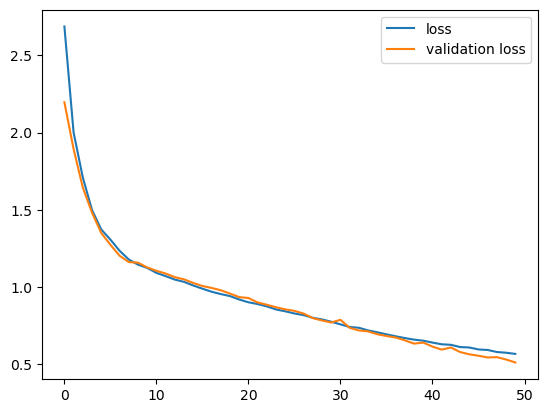

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.show()

In [70]:
model=tf.keras.models.load_model('../models/softmax.keras')
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.5982  
Loss: 0.5116508603096008, Accuracy: 0.8500000238418579


In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

sample_features = np.array([27,2,1,1,1,3,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)

prediction = model.predict(sample_features)

# Wartości softmax dla każdej klasy
print("Predicted softmax probabilities:", prediction)

# Przewidywana klasa
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)
print('')

decoded_classes = label_encoder.inverse_transform(np.arange(len(label_encoder.classes_)))

print('')
rows = []
for class_name, prob in zip(decoded_classes, prediction[0]):
    print(f"Class: {class_name}, Probability: {prob:.4f}")

    row = {'Type': class_name, 'Probabilities': prob}
    rows.append(row)
print('')
predicted_classes = pd.DataFrame(rows)
print(predicted_classes.sort_values('Probabilities', ascending=False))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted softmax probabilities: [[0.03105942 0.02384411 0.03516261 0.02781023 0.03136728 0.8457423
  0.00501405]]
Predicted class: [5]


Class: Basilar-type aura, Probability: 0.0311
Class: Familial hemiplegic migraine, Probability: 0.0238
Class: Migraine without aura, Probability: 0.0352
Class: Other, Probability: 0.0278
Class: Sporadic hemiplegic migraine, Probability: 0.0314
Class: Typical aura with migraine, Probability: 0.8457
Class: Typical aura without migraine, Probability: 0.0050

                            Type  Probabilities
5     Typical aura with migraine         0.8457
2          Migraine without aura         0.0352
4   Sporadic hemiplegic migraine         0.0314
0              Basilar-type aura         0.0311
3                          Other         0.0278
1   Familial hemiplegic migraine         0.0238
6  Typical aura without migraine         0.0050
